# Example for 'custom' LED spectrum and custom constellation


## Define transmitter, receiver and indoor space


In [ ]:
# Import Symbol Constants
from vlc_rolling.constants import Constants as Kt

from vlc_rolling.transmitter import Transmitter

from vlc_rolling.indoorenv import Indoorenv

from vlc_rolling.imagesensor import Imagesensor

from vlc_rolling.rollingshutter import RollingShutter

from vlc_rolling.sightpy import *

# Import numpy
import numpy as np

#Import luxpy   
import luxpy as lx

# Import Matplotlob
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6, 6]
plt.rcParams['figure.facecolor']='white'

In [ ]:
white_wall = rgb(0.9, 0.86, 0.84)
floor_wall = rgb(0.1, 0.1, 0.1)
no_wall = rgb(0.0, 0.0, 0.0)
black_wall = rgb(0.0, 0.0, 0.0)
surface = rgb(0.9, 0.85, 0.8)
# room dimensions in centimeters
WIDTH = 1.0e2
LENGTH = 1.0e2
HEIGHT = 1.0e2

# camera parameters
# CAMERA_CENTER=[]

# Create indoor environment and 3d scene

room = Indoorenv(
    name="Matisse-CornellBox",
    size=[LENGTH, WIDTH, HEIGHT],    
    ceiling=('diffuse', no_wall),
    west=('nowall', no_wall),
    north=('nowall', no_wall),
    east=('nowall', no_wall),
    south=('nowall', white_wall),
    floor=('diffuse', floor_wall)
        )
room.create_environment()
print(room)

room._scene_rt.add(
    Plane(
        material = Diffuse(diff_color=surface),  
        center = vec3(LENGTH/2, HEIGHT/2, WIDTH/2), 
        width = 50,
        height = 50, 
        u_axis = vec3(1.0, 0.0, 0), 
        v_axis = vec3(0.0, 1.0, -1.0)
        )
)

# Create a transmitter-type object
transmitter = Transmitter(
    room=room,
    name="Led1",
    led_type='gaussian',
    reference='RGB-Phosphor',
    position=[LENGTH/2, HEIGHT*0.99, WIDTH/2],
    normal=[0, 0, -1],
    mlambert=1.3,
    wavelengths=[620, 530, 475],
    fwhm=[20, 30, 20],
    constellation='ieee16',
    frequency=1e3,
    luminous_flux=50,
    width=10, #cm,
    length=10 #cm    
            )
print(transmitter)

img_sensor = Imagesensor(
    name="Camera",
    focal_length = 1e0,
    pixel_size = 1,
    image_height = 486,
    image_width = 648,
    camera_center = vec3(LENGTH/2, HEIGHT/2 + 10, WIDTH/2 + 10), # on wall view
    camera_look_at = vec3(LENGTH/2, HEIGHT/2, WIDTH/2), # on wall view    
    # camera_center = vec3(1.5*LENGTH, HEIGHT/2, 1.5*WIDTH), # on wall view
    # camera_look_at = vec3(LENGTH/2, HEIGHT/2, WIDTH/2), # on wall view
    room = room,
    transmitter=transmitter,
    sensor='SonyIMX219PQH5-C'
    )
print(img_sensor)
img_sensor.plot_responsivity()
img_sensor.take_picture(plot='false', samples_per_pixel=100)
img_sensor.plot_rgblinear_image(save='on')
img_sensor.plot_crosstalk_rgblinear_image()


INFO:root:Symbols CSK array shape: (3, 100)
INFO:root:No Symbol:21
INFO:root:Im_crosstalk_rgblinear shape: (486, 648, 3)
INFO:root:Image current shape: [[3.5418e-03 3.0762e-02 3.4024e-03 ... 3.2730e-02 3.5697e-03 3.0516e-02]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [1.5504e-02 3.5171e-03 1.5504e-02 ... 3.5721e-03 1.4766e-02 3.5171e-03]
 [1.6175e-03 1.5504e-02 1.7012e-03 ... 1.5012e-02 1.7291e-03 1.5258e-02]
 [1.5012e-02 3.4072e-03 1.5258e-02 ... 3.1874e-03 1.4766e-02 3.4622e-03]]
INFO:root:Maximum value of Bayer image:255.0
INFO:root:Voltage image: [[1.1249e+01 9.7699e+01 1.0806e+01 ... 1.0395e+02 1.1337e+01 9.6917e+01]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [4.9240e+01 1.1170e+01 4.9240e+01 ... 1.1345e+01 4.6895e+01 1.1170e+01]
 [5.1373e+00 4.9240e+01 5.4030e+00 ..

Current mean:
0.02323141505941346
Variance of noise
2.7428894e-17 2.185863232478128e-15


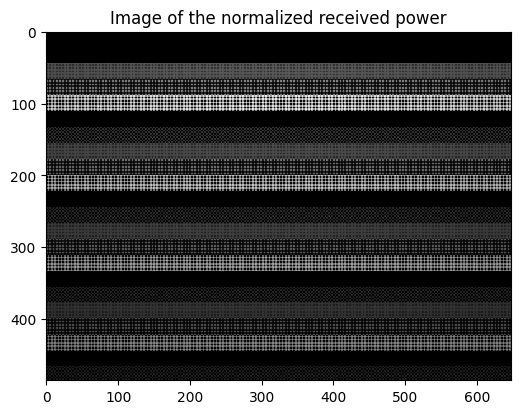

INFO:root:RGB image: [[[ 5 24  0]
  [ 5 24  0]
  [ 5  0  0]
  ...
  [ 5 26  0]
  [ 6  0  0]
  [ 6  0  0]]

 [[ 5 24  0]
  [ 5 24  0]
  [ 5  0  0]
  ...
  [ 5 26  0]
  [ 6  0  0]
  [ 6  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[ 5 49 11]
  [ 5 49 11]
  [ 5 49 11]
  ...
  [ 5 47 11]
  [ 5 46 11]
  [ 5 46 11]]

 [[ 5 49 11]
  [ 5 49 11]
  [ 5 48 11]
  ...
  [ 5 47 11]
  [ 5 47 11]
  [ 5 47 11]]

 [[ 5 49 11]
  [ 5 49 11]
  [ 5 48 11]
  ...
  [ 5 47 11]
  [ 5 47 11]
  [ 5 47 11]]]


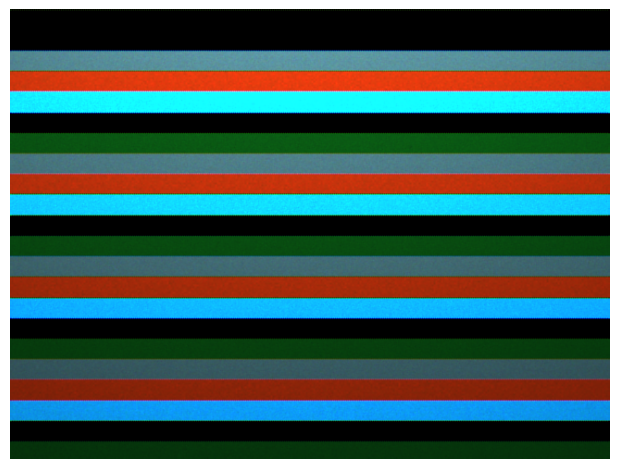

Adding blur effect ...


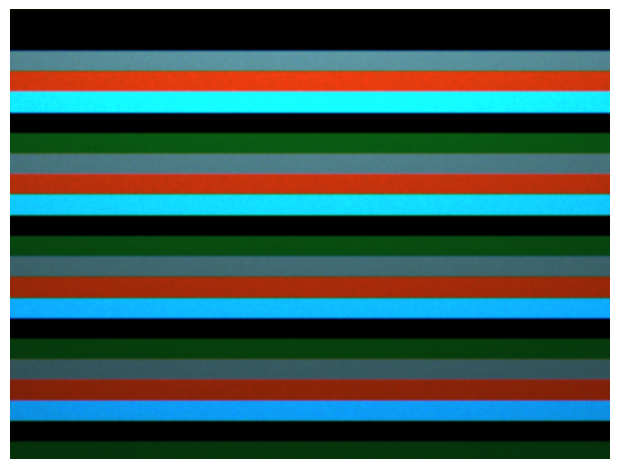

In [42]:
f = 3e2
transmitter._frequency = f
rollingshutter = RollingShutter(
    name="rs",
    t_exposure=800-6,
    t_rowshift=150e-6,
    t_offset=0,
    iso=800,    
    adc_resolution=8,
    gain_pixel=4e0,
    temperature=298,
    idark=1,
    transmitter=transmitter,
    imagesensor=img_sensor
)

rollingshutter.plot_current_image()
rollingshutter.plot_color_image(save='on')
rollingshutter.add_blur(size=7, center=3.5, sigma=0.8)
rollingshutter.plot_blurred_image()